Extracting data from average f1 scores and plotting it

Basic code to read data from the files and get the weighted average

In [79]:
import matplotlib.pyplot as plt
class filesToRead:
    def __init__(self):
        self.fileList = []
        self.precision = False
        self.recall = False
        self.f1Score = False

    def addFile(self, fileStr):
        self.fileList.append(fileStr)

    def getFileList(self):
        return len(self.fileList)

    def readFile(self):
        #Get all the files and read them
        avgList = [[],[],[]]
        for x in self.fileList:
            File_results = open(x)
            File_object = File_results.readlines()
            #Find the weighted avg line in the file and split the line into a list using space delimination
            for txt in File_object:
                if "precision" in txt:
                    precisionCol = txt.split().index("precision")
                if "recall" in txt:
                    recallCol = txt.split().index("recall")
                if "f1-score" in txt:
                    f1Col = txt.split().index("f1-score")
                if "weighted avg" in txt:
                    s = txt.split()
                
            #Adds to a list the f1 score avg(fifth item in list because weighted avg takes up 2 spaces in list)
            if self.precision:
                avgList[0].append(float(s[2+precisionCol]))
            if self.recall:
                avgList[1].append(float(s[2+recallCol]))
            if self.f1Score:
                avgList[2].append(float(s[2+f1Col]))
        return avgList


Function that takes in the list returned from reading the files and plots it

In [82]:
def createGraph(n, fileClass, name):
    #list that havee all ints from 1 to len of n
    xl = list(range(1, len(n[0])+1))
    x2 = list(range(1, len(n[1])+1))
    x3 = list(range(1, len(n[2])+1))
    
    #plot with x as the number of values in n, and y is list n
    plt.plot(xl, n[0], marker = 'o', label = "Precision")
    plt.plot(x2, n[1], marker = 'x', label = "Recall")
    plt.plot(x3, n[2], marker = 'v', label = "F1-Score")
    plt.legend(loc="upper left")
    plt.xlim(1, fileClass.getFileList())
    plt.locator_params(axis="x", integer=True, tight=True)
    plt.ylim(0,1)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel("Training Iterations")
    plt.ylabel("Weighted Average")
    label = plt.gca()
    for tick in label.get_xticklabels():
        tick.set_color("red")

    for tick in label.get_yticklabels():
        tick.set_color("red")
    plt.tick_params(axis="both", color = "red")
    plt.savefig(name)
    plt.show()
    plt.close()

Driver code to run functions

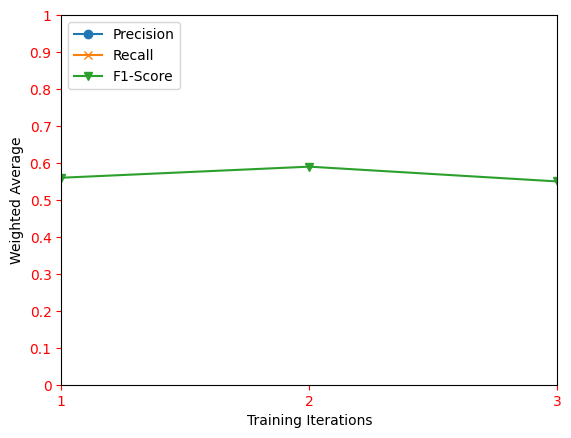

In [83]:
fileReader = filesToRead()
#set to true whatever variable you want to sho up on graph
fileReader.f1Score = True
#Add whatever files you need here: below is an example of how to do it
#tester.addFile("What ever your file name is called")
fileReader.addFile("DIU_Skynet2_CRFcustom.results")
fileReader.addFile("DIU_Skynet3_HMM.results")
fileReader.addFile("DIU_ZR2_1_CRFcustom.results")

#calls the functions to read files and print out the graph
rl = fileReader.readFile()

#fileToBeNamed = input("What do you want the graph file to be named?")
createGraph(rl, fileReader,"fileToBeNamed")
#or can just put graph name into the function call
#createGraph(r1, "whatever name you want the grpah file to be called")


# TODO

* ~~Change font color of labels and tick marks to a ligher color so they are readable against a black background~~
* ~~Add labels to chart~~
    - ~~Y axis "weighted average"~~
    - ~~X axis "Training Iterations"~~
* ~~make it easier to customize .png file name~~
* ~~Plot multiple lines with different colors and markers (e.g. boxes and triangles)~~
    - ~~weighted avg Precision~~
    - ~~weighted avg Recall~~
    - ~~write code that it is easy to add or remove any of these three lines depending on what we want to graph~~
* Create separate charts with information
    - for any chosen class, i.e. if I pick the label in the first column, the code will graph the precision, recall, and F1 from that row